# Analyzing the highest paying skills

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# filtering the dataset only for the data analyst role and country == India
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop nan values from the year salary
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [7]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_top_pay = df_DA_US_group.sort_values(by = 'median', ascending=False).head(10)
df_top_count = df_DA_US_group.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False)
df_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


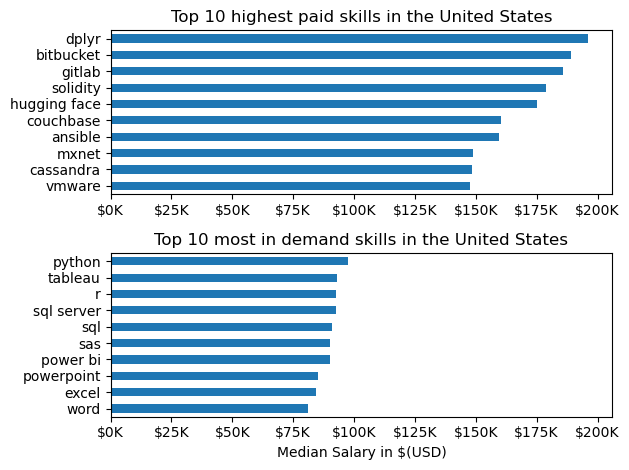

In [22]:
fig, ax = plt.subplots(2,1)

# to plot the graph in reverse start from last element
df_top_pay[::-1].plot(kind='barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 highest paid skills in the United States')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_top_count[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_title('Top 10 most in demand skills in the United States')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary in $(USD)')


fig.tight_layout()